In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# MULTIEVO 
## Parallel vs serial
Using the library `multiprocessing` to evolve many independent simulations in parallel. n_workers = n_cores (8) 

 See `final_multievo_experiments.py`to see how data is created.

In [5]:
df = pd.read_csv("parallel_vs_serial_ONETSTEP.csv")
std_group = df.groupby(['n_particles', 'n_simulations'])[['parallel_time', 'serial_time']].agg(['mean', 'std'])


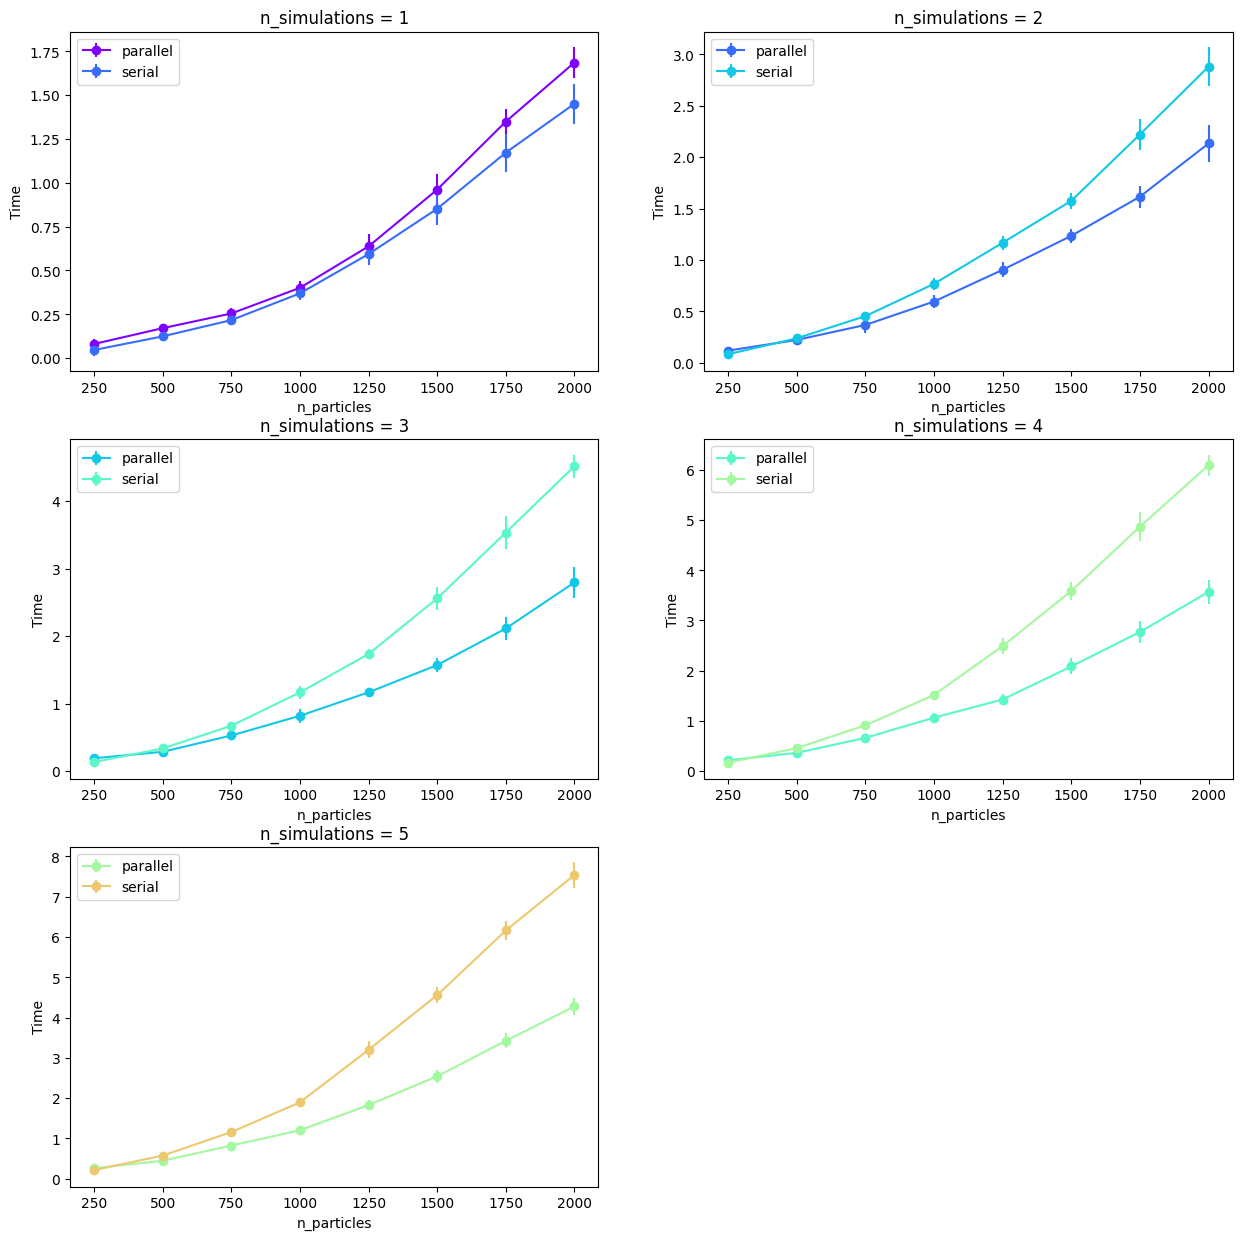

In [6]:
fig,axs = plt.subplots(3,2,figsize=(15,15))
axs = axs.flatten() # for easy indexing

# Get a rainbow colormap
cmap = plt.get_cmap('rainbow')
colors = np.linspace(0,1,8)


i = 0 
for name, group in std_group[["parallel_time","serial_time"]].groupby("n_simulations"):
    ax = axs[i]
    
    # each group has n_particles fixed (that is its "name")
    n_particles = group["parallel_time"]["mean"].keys().get_level_values(0).values #[ 250  500  750 1000 1250 1500 1750 2000]
    # group.values are parallel times
    # group.values.shape (8,2)
    # Create new axes
    
    # group.values.shape = (8,4) mean,std,mean,std
    # Plot the scatter
    
    ax.errorbar(n_particles, group["parallel_time"].values[:,0], yerr=group["parallel_time"].values[:,1],marker="o", label="parallel",c= cmap(colors[i]))
    ax.errorbar(n_particles, group["serial_time"].values[:,0], yerr=group["serial_time"].values[:,1], marker="o",label="serial",c= cmap(colors[i+1]))
    
    # Set labels and title
    ax.set_xlabel('n_particles')
    ax.set_ylabel('Time')
    ax.set_title(f'n_simulations = {name}')
    
    
    
    # Add legend
    ax.legend()

    i +=1 
    
fig.delaxes(axs[-1])

# Show the plot
plt.show()
    
